# This contains the code for exploratory data analysis and model training-testing 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gayatrikvr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
#ngram
from nltk.util import ngrams
from collections import Counter
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [283]:
#reading training dataset
df_amazon=pd.read_csv("AmazonHelp_CleanedData.csv")
df_tesla=pd.read_csv("Tesla_CleanedData.csv")
df_apple=pd.read_csv("Apple_CleanedData.csv")

In [284]:
df_amazon.drop(df_amazon.columns[0],inplace=True,axis=1)
df_tesla.drop(df_tesla.columns[0],inplace=True,axis=1)
df_apple.drop(df_apple.columns[0],inplace=True,axis=1)

In [285]:
#drop blank tweets
df_amazon.dropna(subset=["Text","Text_Cleaned"],inplace=True)
df_tesla.dropna(subset=["Text","Text_Cleaned"],inplace=True)
df_apple.dropna(subset=["Text","Text_Cleaned"],inplace=True)

In [359]:
#functions to perform exploratory data analysis

In [286]:
def know_your_data(df):
    print("Number of rows and columns: {}".format(df.shape))
    print("Data columns: {}".format(df.columns))
    print("The null values are: {}".format(df.isnull().sum()))

In [287]:
#function to plot word cloud
#code reference taken from: https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571
def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=stopwords.words('english')
    newStopWords = ['tesla','tsla','http','https co']
    stop.extend(newStopWords)
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

In [288]:
#function plots the top n-gram
#code reference taken from: https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

In [289]:
# Code Snippet for Word Number Histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).hist()

In [290]:
# Code Snippet for Character Length Histogram
def plot_character_length_histogram(text):
    text.str.len().\
        hist()

In [291]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

In [292]:
#code reference taken from: https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

AmazonHelp data analysis

In [294]:
know_your_data(df_amazon)

Number of rows and columns: (2988, 9)
Data columns: Index(['Tweet Id', 'Text', 'no_contract', 'tokenized', 'lower_case',
       'punctuation_removed', 'stopwords_removed', 'Text_Cleaned', 'Target'],
      dtype='object')
The null values are: Tweet Id               0
Text                   0
no_contract            0
tokenized              0
lower_case             0
punctuation_removed    0
stopwords_removed      0
Text_Cleaned           0
Target                 0
dtype: int64


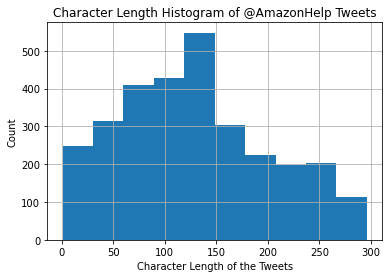

In [295]:
plot_character_length_histogram(df_amazon['Text'])
plt.xlabel('Character Length of the Tweets')
plt.ylabel('Count')
 
# displaying the title
plt.title("Character Length Histogram of @AmazonHelp Tweets")
 
plt.show()

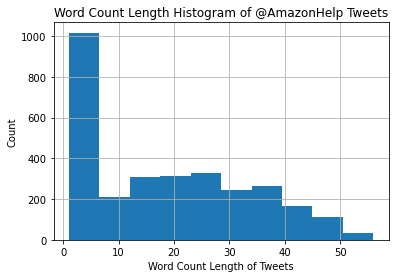

In [296]:
plot_word_number_histogram(df_amazon['Text'])
plt.xlabel('Word Count Length of Tweets')
plt.ylabel('Count')
 
# displaying the title
plt.title("Word Count Length Histogram of @AmazonHelp Tweets")
 
plt.show()

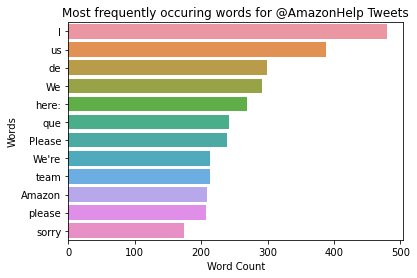

In [297]:
plot_top_non_stopwords_barchart(df_amazon['Text'])
plt.xlabel('Word Count')
plt.ylabel('Words')
 
# displaying the title
plt.title("Most frequently occuring words for @AmazonHelp Tweets")
 
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gayatrikvr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


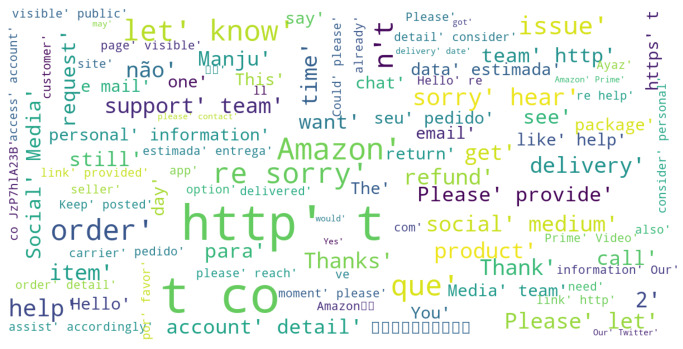

In [298]:
plot_wordcloud(df_amazon['Text'])

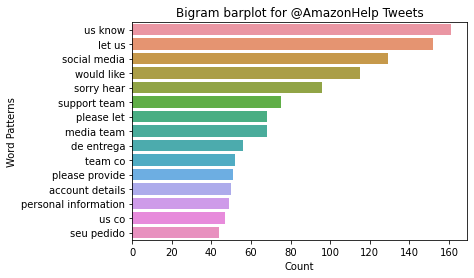

In [299]:
top_n_bigrams_amazon=get_top_ngram(df_amazon['Text_Cleaned'],2)[:15]
x,y=map(list,zip(*top_n_bigrams_amazon))
sns.barplot(x=y,y=x)
plt.xlabel('Count')
plt.ylabel('Word Patterns')
 
# displaying the title
plt.title("Bigram barplot for @AmazonHelp Tweets")
 
plt.show()

In [300]:
Tesla data analysis

In [301]:
know_your_data(df_tesla)

Number of rows and columns: (2946, 9)
Data columns: Index(['Tweet Id', 'Text', 'no_contract', 'tokenized', 'lower_case',
       'punctuation_removed', 'stopwords_removed', 'Text_Cleaned', 'Target'],
      dtype='object')
The null values are: Tweet Id               0
Text                   0
no_contract            0
tokenized              0
lower_case             0
punctuation_removed    0
stopwords_removed      0
Text_Cleaned           0
Target                 0
dtype: int64


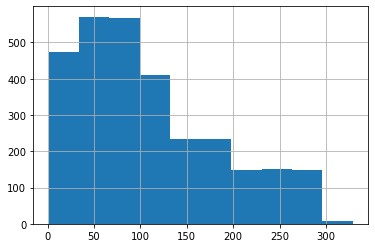

In [302]:
plot_character_length_histogram(df_tesla['Text'])

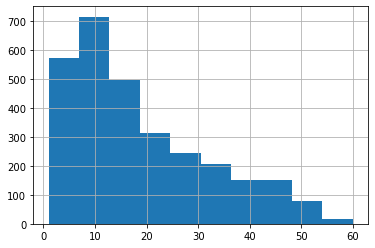

In [303]:
plot_word_number_histogram(df_tesla['Text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gayatrikvr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


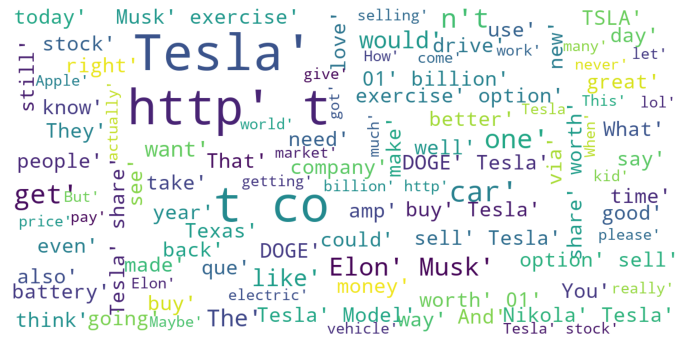

In [305]:
plot_wordcloud(df_tesla['Text'])

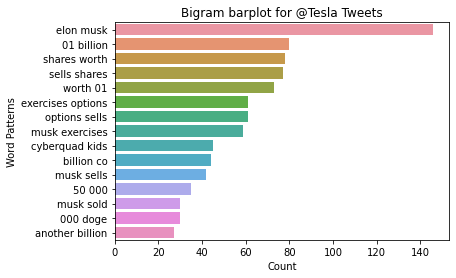

In [306]:
top_n_bigrams_tesla=get_top_ngram(df_tesla['Text_Cleaned'],2)[:15]
x,y=map(list,zip(*top_n_bigrams_tesla))
sns.barplot(x=y,y=x)
plt.xlabel('Count')
plt.ylabel('Word Patterns')
 
# displaying the title
plt.title("Bigram barplot for @Tesla Tweets")
 
plt.show()

iPhone data analysis

In [308]:
know_your_data(df_apple)

Number of rows and columns: (1500, 9)
Data columns: Index(['Text', 'Tweet Id', 'no_contract', 'tokenized', 'lower_case',
       'punctuation_removed', 'stopwords_removed', 'Text_Cleaned', 'Target'],
      dtype='object')
The null values are: Text                   0
Tweet Id               0
no_contract            0
tokenized              0
lower_case             0
punctuation_removed    0
stopwords_removed      0
Text_Cleaned           0
Target                 0
dtype: int64


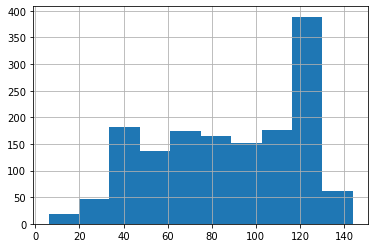

In [309]:
plot_character_length_histogram(df_apple['Text'])

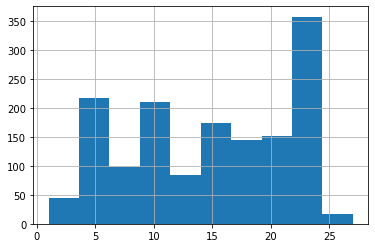

In [310]:
plot_word_number_histogram(df_apple['Text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gayatrikvr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


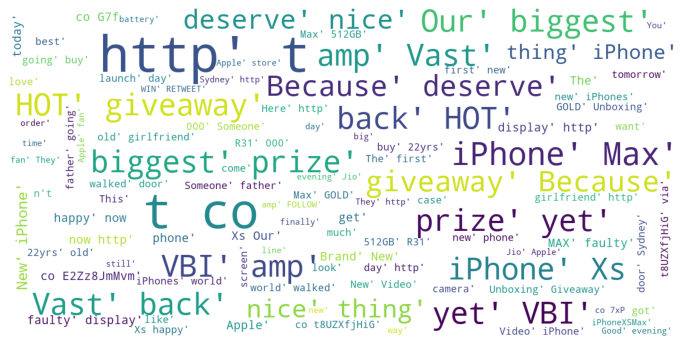

In [311]:
plot_wordcloud(df_apple['Text'])

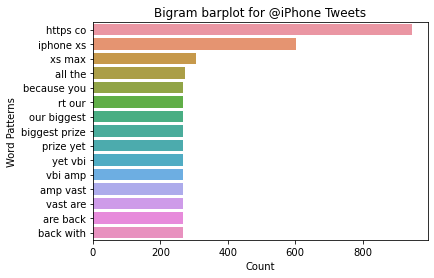

In [312]:
top_n_bigrams_apple=get_top_ngram(df_apple['Text'],2)[:15]
x,y=map(list,zip(*top_n_bigrams_apple))
sns.barplot(x=y,y=x)
plt.xlabel('Count')
plt.ylabel('Word Patterns')
 
# displaying the title
plt.title("Bigram barplot for @iPhone Tweets")
 
plt.show()

In [313]:
#creating the training dataset
frames=[df_amazon, df_tesla,df_apple]
df_train = pd.concat(frames)

In [314]:
#drop nan values
#drop blank tweets
df_train = df_train.dropna(subset=['Text_Cleaned'])

Train data exploratory data analysis

In [315]:
know_your_data(df_train)
print("The target class distribution: {}".format(df_train.Target.value_counts()))

Number of rows and columns: (7434, 9)
Data columns: Index(['Tweet Id', 'Text', 'no_contract', 'tokenized', 'lower_case',
       'punctuation_removed', 'stopwords_removed', 'Text_Cleaned', 'Target'],
      dtype='object')
The null values are: Tweet Id               0
Text                   0
no_contract            0
tokenized              0
lower_case             0
punctuation_removed    0
stopwords_removed      0
Text_Cleaned           0
Target                 0
dtype: int64
The target class distribution: 0    4446
1    2988
Name: Target, dtype: int64


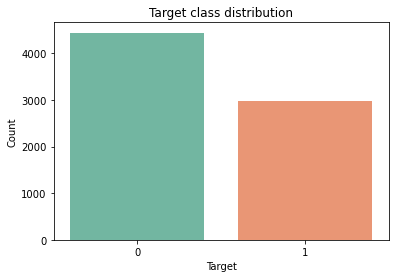

In [316]:
sns.countplot(x ='Target', data =df_train , palette = "Set2")
plt.ylabel('Count')
plt.xlabel('Target') 
# displaying the title
plt.title("Target class distribution")

 # Show the plot
plt.show()


In [317]:
df_train["Target"].value_counts()

0    4446
1    2988
Name: Target, dtype: int64

In [318]:
#test datset
df_test=pd.read_csv('Uber_CleanedData.csv')
df_test.drop(df_test.columns[0],inplace=True,axis=1)

In [319]:
know_your_data(df_test)

Number of rows and columns: (2999, 12)
Data columns: Index(['Tweet Id', 'Text', 'Retweets', 'Language', 'Tweet Type', 'no_contract',
       'tokenized', 'lower_case', 'punctuation_removed', 'stopwords_removed',
       'Text_Cleaned', 'Target'],
      dtype='object')
The null values are: Tweet Id               0
Text                   0
Retweets               0
Language               0
Tweet Type             0
no_contract            0
tokenized              0
lower_case             0
punctuation_removed    0
stopwords_removed      0
Text_Cleaned           0
Target                 0
dtype: int64


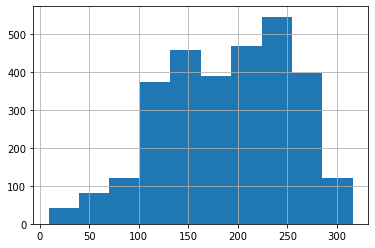

In [320]:
plot_character_length_histogram(df_test['Text'])

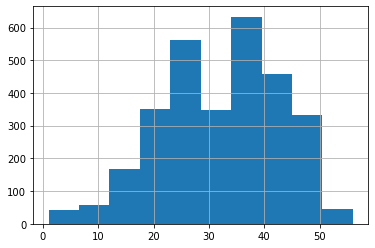

In [321]:
plot_word_number_histogram(df_test['Text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gayatrikvr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


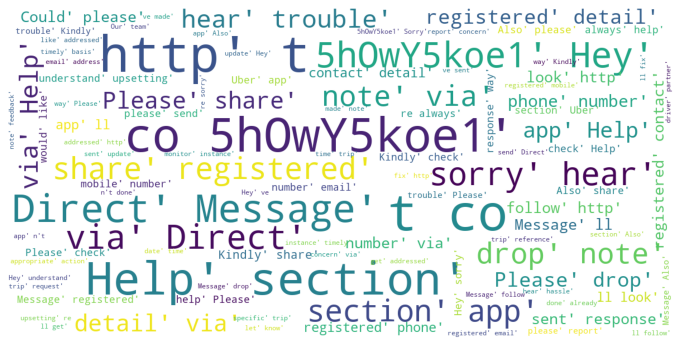

In [322]:
plot_wordcloud(df_test['Text'])

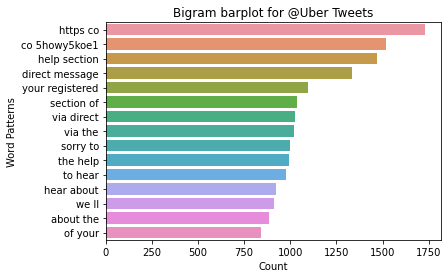

In [323]:
top_n_bigrams_uber=get_top_ngram(df_test['Text'],2)[:15]
x,y=map(list,zip(*top_n_bigrams_uber))
sns.barplot(x=y,y=x)
plt.xlabel('Count')
plt.ylabel('Word Patterns')
 
# displaying the title
plt.title("Bigram barplot for @Uber Tweets")
 
plt.show()

##model building

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [350]:
xSet = df_train['Text_Cleaned'].values
ySet = df_train["Target"].values
#Splitting Train and Test Data
xSet_train,xSet_test,ySet_train,ySet_test = train_test_split(xSet,ySet,test_size=0.2)

In [351]:
CV = CountVectorizer(stop_words="english")
xSet_train_CV = CV.fit_transform(xSet_train)

In [352]:
#Training a model on train and validation dataset

In [353]:
xSet_test_CV = CV.transform(xSet_test)

In [354]:
NB = MultinomialNB()
NB.fit(xSet_train_CV,ySet_train)
ySet_predict = NB.predict(xSet_test_CV)
accuracyScore = accuracy_score(ySet_test,ySet_predict)*100
print("Prediction Accuracy on the validation dataset is :",accuracyScore)

Prediction Accuracy on the validation dataset is : 91.12306657700067


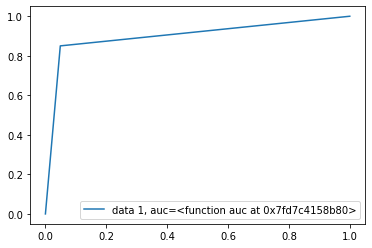

In [355]:
#Calculate AUC 
from sklearn.metrics import roc_curve, auc
fpr, tpr, treshold = roc_curve(ySet_test, ySet_predict)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [358]:
roc_auc

0.900598144993375

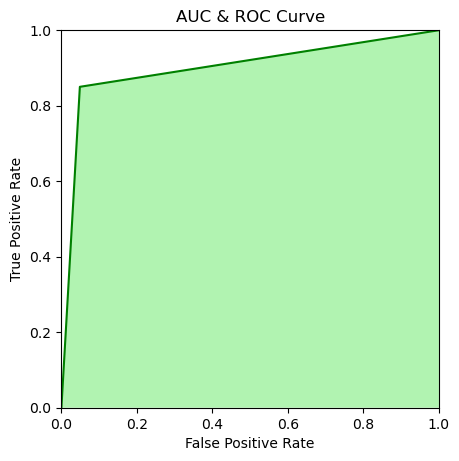

In [357]:
plt.figure(figsize=(5, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr,tpr, 'g')
plt.fill_between(fpr,tpr, facecolor='lightgreen', alpha=0.7)
#plt.text(roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [332]:
#Testing the model on the dataset

In [333]:
#model 

In [334]:
xSet = df_train['Text_Cleaned'].values
ySet = df_train["Target"].values

In [335]:
CV = CountVectorizer(stop_words="english")
xSet_train_CV = CV.fit_transform(xSet_train)

In [336]:
xSet_test=df_test['Text_Cleaned'].values
ySet_test=df_test["Target"].values

In [337]:
xtest_CV = CV.transform(xSet_test)

In [338]:
#Naive Bayes
NB = MultinomialNB()
NB.fit(xSet_train_CV,ySet_train)
ySet_predict_NB = NB.predict(xtest_CV)

precisionScoreNB=precision_score(ySet_test,ySet_predict_NB,average='micro')*100
print("Prediction Precision :","{:.2f}".format(precisionScoreNB),"%")
f1_score_NB=f1_score(ySet_test,ySet_predict_NB, average='micro') 
print("F1 Score :","{:.2f}".format(f1_score_NB))

Prediction Precision : 96.83 %
F1 Score : 0.97


In [339]:
#Logistic Regression
LR = LogisticRegression() # get instance of model
LR.fit(xSet_train_CV,ySet_train) # Train/Fit model 
ySet_predict_LR = LR.predict(xtest_CV) # get y predictions

precisionScoreLR=precision_score(ySet_test,ySet_predict_LR,average='micro')*100
f1_score_LR=f1_score(ySet_test,ySet_predict_LR, average='micro') 
print("Prediction Precision :","{:.2f}".format(precisionScoreLR),"%")
print("F1 Score :","{:.2f}".format(f1_score_LR))

Prediction Precision : 94.46 %
F1 Score : 0.94


In [340]:
#Random Forest Classifier
RFC = RandomForestClassifier(random_state=1)# get instance of model
RFC.fit(xSet_train_CV,ySet_train) # Train/Fit model 
ySet_predict_RFC = RFC.predict(xtest_CV) # get y predictions

precisionScoreRFC=precision_score(ySet_test,ySet_predict_RFC,average='micro')*100
f1_score_RFC=f1_score(ySet_test,ySet_predict_RFC, average='micro') 
print("Prediction Precision :","{:.2f}".format(precisionScoreRFC),"%")
print("F1 Score :","{:.2f}".format(f1_score_RFC))

Prediction Precision : 93.60 %
F1 Score : 0.94


In [341]:
output= {'Algorithm':['Naive Bayes Classifier', 'Logistic Regression', 'Random Forest Classifier'],
        'Precision':[precisionScoreNB, precisionScoreLR, precisionScoreRFC],"F1-Score":[f1_score_NB,f1_score_LR,f1_score_RFC]}
output_df=pd.DataFrame(output)

In [342]:
output_df

,Algorithm,Precision,F1-Score
0,Naive Bayes Classifier,96.832277,0.968323
1,Logistic Regression,94.464822,0.944648
2,Random Forest Classifier,93.597866,0.935979
